In [1]:
import sys
path = '/Users/Everwitt/Documents/Pitch-Prediction/pitcherprediction'
sys.path.append(path)

In [2]:
import pandas as pd
import numpy as np

#importing path to obvious_zones allows us to import
from obvious_zones import *

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#these values are actually based on the universal strike zone values
RIGHT = 0.831
TOP = 1.074
obv_zones = ObviousZones(RIGHT, TOP)

In [4]:
print(obv_zones)

Cutoff Coordinates= > left_x: -0.831, right_x: 0.831top_y: 1.074, bot_y: -1.074


In [5]:
p = pd.read_csv('./obv_zone_cutoff.csv')

In [6]:
p['obv_zone'].value_counts()

12b    420117
15b    416363
13b    389123
16b    179081
10b    140269
14b     94646
9b      47673
11b     24377
Name: obv_zone, dtype: int64

In [7]:
p['pitch_type'].value_counts()

FF    560352
FT    335452
SL    322500
CH    225681
CU    168828
FC     98836
Name: pitch_type, dtype: int64

In [8]:
p.shape

(1711649, 16)

In [9]:
#For Each Pitch
ff = p.loc[p['pitch_type'] == 'FF']
ft = p.loc[p['pitch_type'] == 'FT']
fc = p.loc[p['pitch_type'] == 'FC']
sl = p.loc[p['pitch_type'] == 'SL']
ch = p.loc[p['pitch_type'] == 'CH']
cu = p.loc[p['pitch_type'] == 'CU']
#For Each Zone
#Swing/Take % -> We want like a heat map of sorts that is based on this pct

## FourSeam Fastball Zone Breakdowns

In [10]:
filt = ff['obv_zone'] == '9b'
z = ff.loc[filt, ['px', 'py', 'swing']]

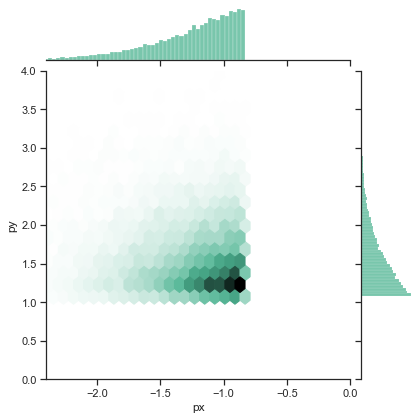

In [11]:
#px, py hexbin for all pitches in obvious zone 9b
sns.set_theme(style="ticks")
plot = sns.jointplot(x=z['px'], y=z['py'], kind="hex", color="#4CB391")

xs = .6
ys = 1

plot.ax_marg_x.set_xlim(-4*xs, 0)
plot.ax_marg_y.set_ylim(0, 4)

plt.show()

In [12]:
#from original cleaning kaggle
x_arb = -1.2
y_arb = 1.4

#inside that square what is the %swing/take?
filt = ((z['py'] < y_arb) & (z['px'] > x_arb))
zf = z.loc[filt]
znf = z.loc[~filt]

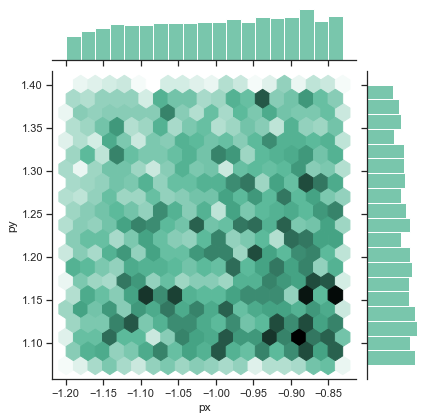

In [13]:
#px, py density of pitches inside our old 9b cutoff
sns.set_theme(style="ticks")
plot = sns.jointplot(x=zf['px'], y=zf['py'], kind="hex", color="#4CB391")
plt.show()

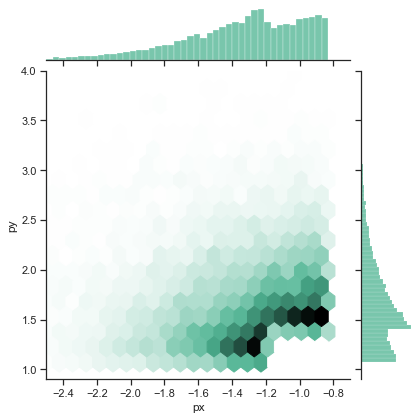

In [14]:
#px, py density of pitches outside our old 9b cutof
sns.set_theme(style="ticks")
plot = sns.jointplot(x=znf['px'], y=znf['py'], kind="hex", color="#4CB391")
plot.ax_marg_x.set_xlim(-2.5, -.7)
plot.ax_marg_y.set_ylim(.9, 4)
plt.show()

In [15]:
#showing swing% for a list of arbitrary zone cutoffs
x_arb = [-0.831 - .09*x for x in range(6)]
y_arb = [1.074 + .1*x for x in range(6)]
x_arb.pop(0)
y_arb.pop(0)

print(z.shape, '\n')
for x,y in zip(x_arb, y_arb):
    filt = (z['py'] < y) & (z['px'] > x)
    zf = z.loc[filt, 'swing']
    znf = z.loc[~filt, 'swing']

    print(f"Coordinates: ({x,y})")
    print(f"Num Pitches in Ball Zone: {zf.shape[0]}")
    print(f"Num Pitches in Obv Zone: {znf.shape[0]}")
    
    print("Non-Obv Ball Zones")
    print(f"Num Swings: {zf.sum()}")
    print(f"Num Takes : {zf.count()-zf.sum()}")
    print(f"Swing%: {zf.sum()/zf.count()}")
    print(f"Take%: {1 - zf.sum()/zf.count()}")
    print()

(25633, 3) 

Coordinates: ((-0.9209999999999999, 1.1740000000000002))
Num Pitches in Ball Zone: 638
Num Pitches in Obv Zone: 24995
Non-Obv Ball Zones
Num Swings: 207
Num Takes : 431
Swing%: 0.32445141065830724
Take%: 0.6755485893416928

Coordinates: ((-1.011, 1.274))
Num Pitches in Ball Zone: 2216
Num Pitches in Obv Zone: 23417
Non-Obv Ball Zones
Num Swings: 600
Num Takes : 1616
Swing%: 0.27075812274368233
Take%: 0.7292418772563176

Coordinates: ((-1.101, 1.374))
Num Pitches in Ball Zone: 4441
Num Pitches in Obv Zone: 21192
Non-Obv Ball Zones
Num Swings: 1006
Num Takes : 3435
Swing%: 0.22652555730691284
Take%: 0.7734744426930872

Coordinates: ((-1.1909999999999998, 1.4740000000000002))
Num Pitches in Ball Zone: 6987
Num Pitches in Obv Zone: 18646
Non-Obv Ball Zones
Num Swings: 1328
Num Takes : 5659
Swing%: 0.19006726778302563
Take%: 0.8099327322169744

Coordinates: ((-1.281, 1.574))
Num Pitches in Ball Zone: 9637
Num Pitches in Obv Zone: 15996
Non-Obv Ball Zones
Num Swings: 1575
Num Ta

In [16]:
#look at min and max values of px py
z.describe()

,px,py,swing
count,25633.000000,25633.000000,25633.000000
mean,-1.277994,1.585997,0.078727
std,0.382277,0.461665,0.269317
min,-4.811587,1.074062,0.000000
25%,-1.468187,1.240896,0.000000
50%,-1.180000,1.457000,0.000000
75%,-0.990000,1.802000,0.000000
max,-0.831038,9.611000,1.000000


In [17]:
#x_cut was -1.2, y_cut was 1.4 for previous cutoffs
num_points = 16
xx = np.linspace(-0.831, -1.8, num_points)
yy = np.linspace(1.074, 2, num_points)

#remove the endpoint
xx = np.delete(xx, 0)
yy = np.delete(yy, 0)

In [18]:
#we need these dimensions to be the same, otherwise plot will not work
print(xx.shape, yy.shape)

(15,) (15,)


In [19]:
def calc_cum_swing_pct(x_r, y_r, df):
    swing_pct = np.zeros((x_r.shape[0],y_r.shape[0]))
    for i, vx in enumerate(x_r):
        for j, vy in enumerate(y_r):
            filt = (df['px'] > vx) & (df['py'] < vy)
            pitches = df.loc[filt]            
            swing_pct[i][j] = pitches['swing'].sum()/pitches['swing'].count()

    return swing_pct
            
swing_cum_pct = calc_cum_swing_pct(xx, yy, z)

In [20]:
def calc_point_swing_pct(x_r, y_r, df):
    swing_pct = np.zeros((x_r.shape[0],y_r.shape[0]))

    #need these to calculate point density
    x_dist = abs(x_r[0] - x_r[1])
    y_dist = abs(y_r[0] - y_r[1])
    
    for i, vx in enumerate(x_r):
        for j, vy in enumerate(y_r):
            filt = (df['px'] > vx) & (df['px'] < vx+x_dist) & (df['py'] < vy) & (df['py'] > vy-y_dist)
            pitches = df.loc[filt]            
            swing_pct[i][j] = pitches['swing'].sum()/pitches['swing'].count()

    return swing_pct

swing_point_pct = calc_point_swing_pct(xx, yy, z)

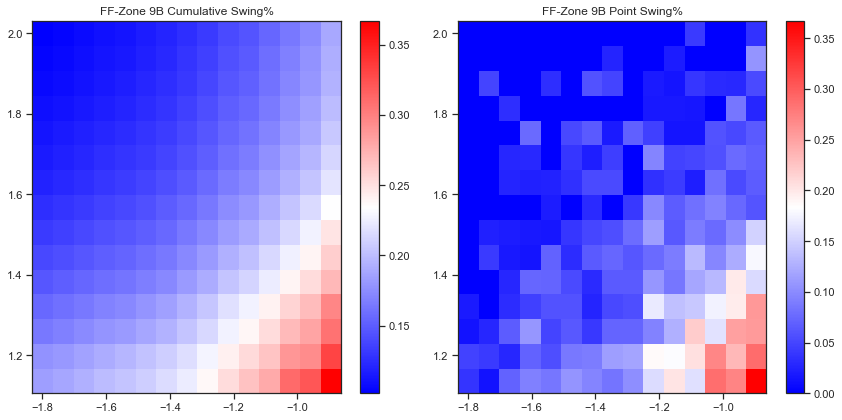

In [21]:
#this does not tell us how many pitches are in the ball zone - whether the cutoff makes sense
#this is also the cumulative swing%
w,h = 12,6
fig, axs = plt.subplots(1,2,figsize=(w, h))

ax = axs[0]
c = ax.pcolor(xx, yy, swing_cum_pct, cmap='bwr', shading='auto')
ax.set_title('FF-Zone 9B Cumulative Swing%')
fig.colorbar(c, ax=ax)

ax = axs[1]
c = ax.pcolor(xx, yy, swing_point_pct, cmap='bwr', shading='auto')
ax.set_title('FF-Zone 9B Point Swing%')
fig.colorbar(c, ax=ax)

fig.tight_layout()
plt.show()

In [22]:
#I can write the code to go from coordinates to JSON
#and I can write the function that takes in that JSON, iterates through it to create each zone => zones => pitch

In [23]:
#doing the same for zone 10b
filt = ff['obv_zone'] == '10b'
z10 = ff.loc[filt, ['px', 'py', 'swing']]

num_points = 16
xx = np.linspace(-0.829, 0.829, num_points)
yy = np.linspace(1.078, 2, num_points)

#remove the endpoint
# xx = np.delete(xx, 0)
# yy = np.delete(yy, 0)

swing_point_pct = calc_point_swing_pct(xx, yy, z10)

In [24]:
z10.describe()

,px,py,swing
count,95813.000000,95813.000000,95813.000000
mean,-0.042156,1.530557,0.291161
std,0.441769,0.406299,0.454300
min,-0.830987,1.074000,0.000000
25%,-0.405078,1.221698,0.000000
50%,-0.057211,1.420000,0.000000
75%,0.311088,1.722000,1.000000
max,0.830914,4.752947,1.000000


In [25]:
def calc_cum_swing_pct(x_r, y_r, df):
    swing_pct = np.zeros((x_r.shape[0],y_r.shape[0]))
    for i, vx in enumerate(x_r):
        for j, vy in enumerate(y_r):
            filt = (df['py'] < vy)
            pitches = df.loc[filt]            
            swing_pct[i][j] = pitches['swing'].sum()/pitches['swing'].count()

    return swing_pct
            
swing_cum_pct = calc_cum_swing_pct(xx, yy, z)

In [26]:
swing_cum_pct

array([[0.17647059, 0.16909295, 0.16031904, 0.14968815, 0.14221639,
        0.13326011, 0.12888322, 0.12122941, 0.11544472, 0.11020728,
        0.10663184, 0.10322164, 0.10074839, 0.09801587, 0.09535934,
        0.09301349],
       [0.17647059, 0.16909295, 0.16031904, 0.14968815, 0.14221639,
        0.13326011, 0.12888322, 0.12122941, 0.11544472, 0.11020728,
        0.10663184, 0.10322164, 0.10074839, 0.09801587, 0.09535934,
        0.09301349],
       [0.17647059, 0.16909295, 0.16031904, 0.14968815, 0.14221639,
        0.13326011, 0.12888322, 0.12122941, 0.11544472, 0.11020728,
        0.10663184, 0.10322164, 0.10074839, 0.09801587, 0.09535934,
        0.09301349],
       [0.17647059, 0.16909295, 0.16031904, 0.14968815, 0.14221639,
        0.13326011, 0.12888322, 0.12122941, 0.11544472, 0.11020728,
        0.10663184, 0.10322164, 0.10074839, 0.09801587, 0.09535934,
        0.09301349],
       [0.17647059, 0.16909295, 0.16031904, 0.14968815, 0.14221639,
        0.13326011, 0.12888322, 

In [27]:
swing_cum_pct = np.transpose(swing_cum_pct)

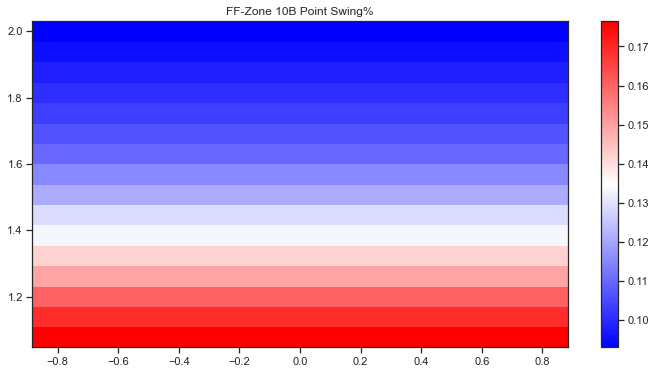

In [28]:
w,h = 12,6
fig, ax = plt.subplots(figsize=(w, h))

c = ax.pcolor(xx, yy, swing_cum_pct, cmap='bwr', shading='auto')
ax.set_title('FF-Zone 10B Point Swing%')
fig.colorbar(c, ax=ax)

In [ ]:
#is this actually what I want???